In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# Load data - Adjust the file path as needed
# Assume the dataset is in a CSV format
data = pd.read_csv('D:\Practice.csv', parse_dates=['settlement_date'], dayfirst=True)

In [19]:
# Display basic information about the dataset
print("Data Overview:")
print(data.head())
print(data.info())



Data Overview:
  settlement_date  settlement_period     nd    tsd  england_wales_demand  \
0      2024-01-01                  1  21783  23466                 19539   
1      2024-01-01                  2  22521  24103                 20286   
2      2024-01-01                  3  22194  24754                 20070   
3      2024-01-01                  4  21510  24505                 19424   
4      2024-01-01                  5  20619  23977                 18674   

   embedded_wind_generation  embedded_wind_capacity  \
0                      2804                    6488   
1                      2834                    6488   
2                      2868                    6488   
3                      2901                    6488   
4                      2933                    6488   

   embedded_solar_generation  embedded_solar_capacity  non_bm_stor  ...  \
0                          0                    16445            0  ...   
1                          0                   

In [21]:
# Data Cleaning - Handle missing values if necessary
data.fillna(0, inplace=True)  # Replace missing values with 0


In [29]:
# Add new columns for analysis
# Calculate the estimated total embedded generation (wind + solar)
data['TOTAL_EMBEDDED_GENERATION'] = data['embedded_wind_generation'] + data['embedded_solar_generation']


In [31]:
# Calculate the net national demand considering embedded generation suppression
data['NET_NATIONAL_DEMAND'] = data['nd'] + data['TOTAL_EMBEDDED_GENERATION']

# Calculate total interconnector flow
data['TOTAL_INTERCONNECTOR_FLOW'] = (
    data['ifa_flow'] + data['ifa2_flow'] + data['moyle_flow'] +
    data['east_west_flow'] + data['nemo_flow'] + data['nsl_flow']
)


In [33]:
# Basic statistics
print("\nBasic Statistics:")
print(data.describe())



Basic Statistics:
                     settlement_date  settlement_period            nd  \
count                          10606       10606.000000  10606.000000   
mean   2024-04-20 00:05:25.853290752          24.495663  25925.392608   
min              2024-01-01 00:00:00           1.000000  15302.000000   
25%              2024-02-25 00:00:00          12.250000  21482.500000   
50%              2024-04-20 00:00:00          24.000000  25017.000000   
75%              2024-06-14 00:00:00          36.000000  29232.500000   
max              2024-08-08 00:00:00          48.000000  45202.000000   
std                              NaN          13.851755   5792.096995   

                tsd  england_wales_demand  embedded_wind_generation  \
count  10606.000000          10606.000000              10606.000000   
mean   27847.999623          23792.700075               1846.103621   
min    17138.000000          13740.000000                229.000000   
25%    23739.750000          19688.5000

In [35]:
# --- Mathematical and Technical Analysis ---

# 1. Demand vs. Supply Metrics
data['DEMAND_SUPPLY_RATIO'] = data['tsd'] / (data['nd'] + 1e-6)  # Avoid division by zero


In [37]:
# 2. Efficiency of Embedded Wind and Solar Capacities
data['WIND_UTILIZATION'] = (data['embedded_wind_generation'] / (data['embedded_wind_capacity'] + 1e-6)) * 100
data['SOLAR_UTILIZATION'] = (data['embedded_solar_generation'] / (data['embedded_solar_capacity'] + 1e-6)) * 100


In [39]:
# 3. Net Import/Export Analysis
data['NET_IMPORT_EXPORT'] = np.where(data['TOTAL_INTERCONNECTOR_FLOW'] > 0, 'Net Import', 'Net Export')


In [41]:
# Group by Import/Export status
import_export_stats = data.groupby('NET_IMPORT_EXPORT')['TOTAL_INTERCONNECTOR_FLOW'].sum()
print("\nNet Import/Export Statistics:")
print(import_export_stats)


Net Import/Export Statistics:
NET_IMPORT_EXPORT
Net Export    -1131835
Net Import    31156225
Name: TOTAL_INTERCONNECTOR_FLOW, dtype: int64


In [43]:
# 4. Analyze Wind and Solar Impact on Demand
wind_impact = data['embedded_wind_generation'].corr(data['nd'])
solar_impact = data['embedded_solar_generation'].corr(data['nd'])

In [45]:
print(f"\nCorrelation of Embedded Wind Generation with National Demand: {wind_impact:.2f}")
print(f"Correlation of Embedded Solar Generation with National Demand: {solar_impact:.2f}")


Correlation of Embedded Wind Generation with National Demand: 0.13
Correlation of Embedded Solar Generation with National Demand: -0.13


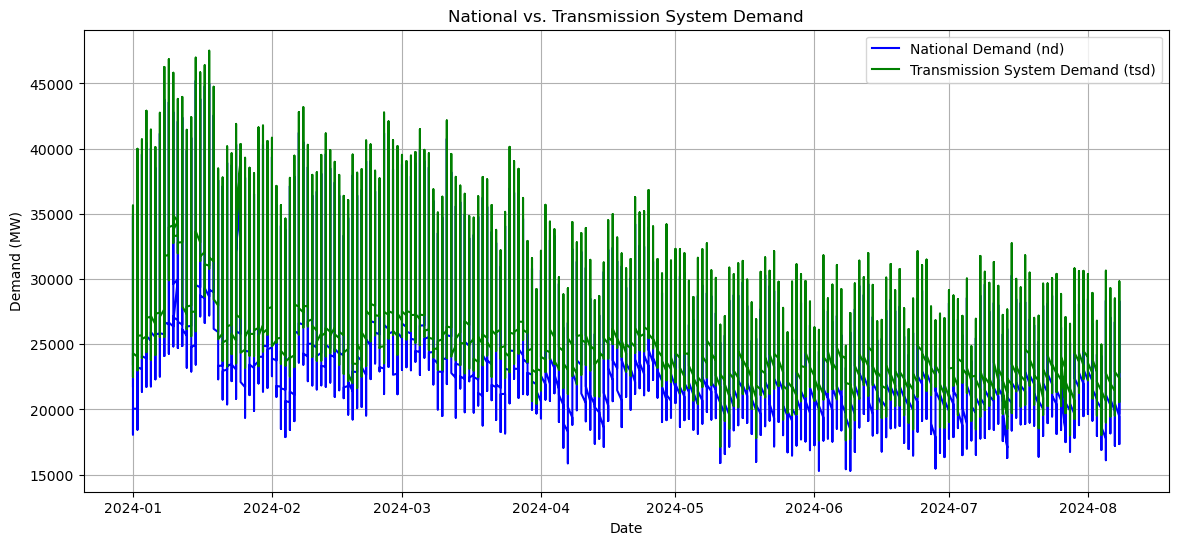

In [53]:
# --- Visualization ---

# Plot National Demand vs. Transmission System Demand
plt.figure(figsize=(14, 6))
plt.plot(data['settlement_date'], data['nd'], label='National Demand (nd)', color='blue')
plt.plot(data['settlement_date'], data['tsd'], label='Transmission System Demand (tsd)', color='green')
plt.xlabel('Date')
plt.ylabel('Demand (MW)')
plt.title('National vs. Transmission System Demand')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\96cra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\96cra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\96cra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\96cra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

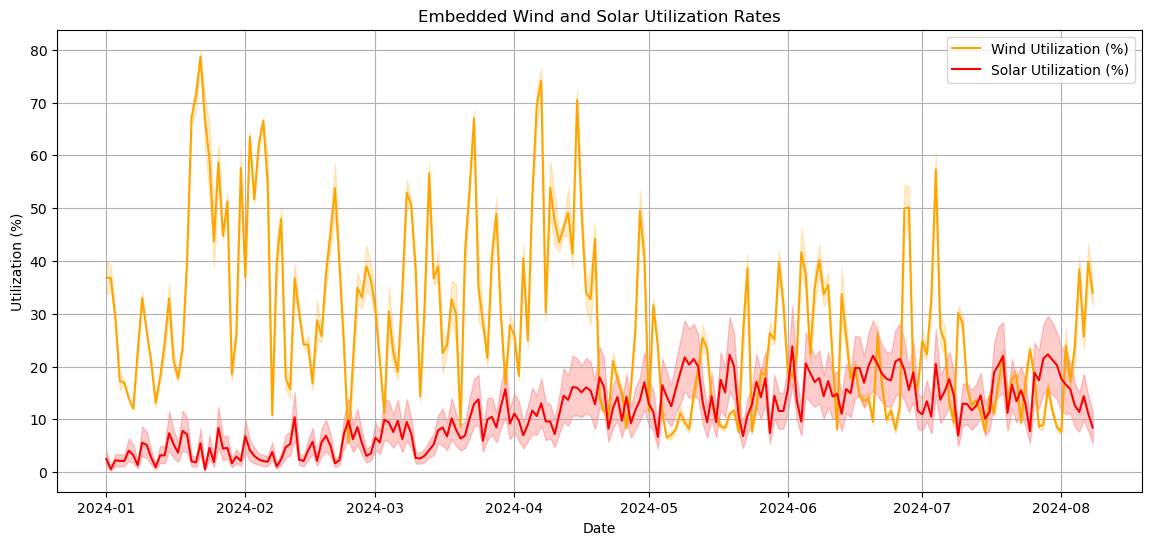

In [55]:
# Plot Embedded Generation Utilization
plt.figure(figsize=(14, 6))
sns.lineplot(data=data, x='settlement_date', y='WIND_UTILIZATION', label='Wind Utilization (%)', color='orange')
sns.lineplot(data=data, x='settlement_date', y='SOLAR_UTILIZATION', label='Solar Utilization (%)', color='red')
plt.xlabel('Date')
plt.ylabel('Utilization (%)')
plt.title('Embedded Wind and Solar Utilization Rates')
plt.grid(True)
plt.show()


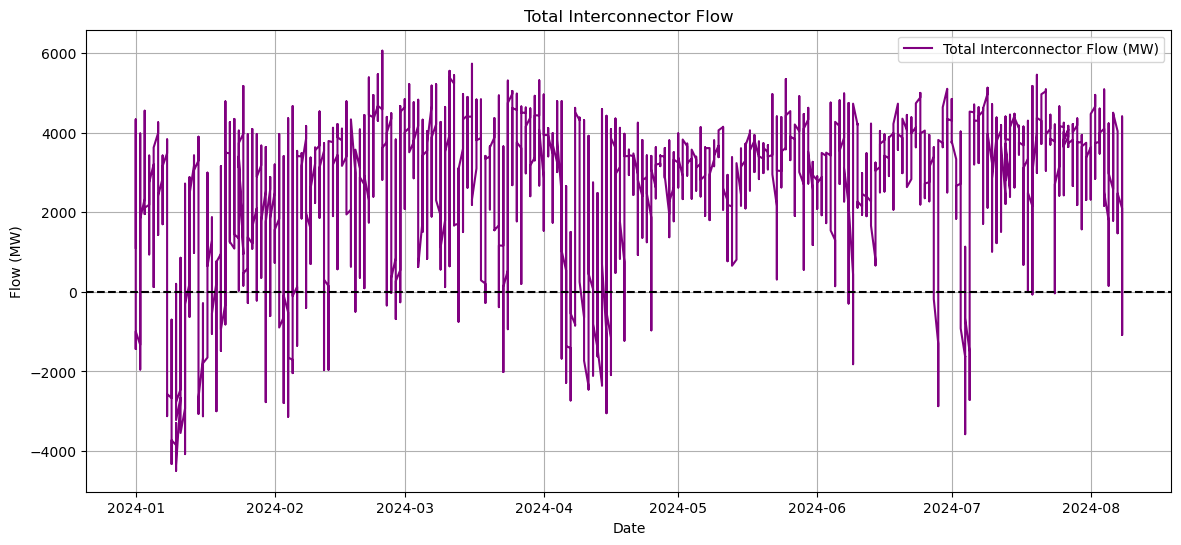

In [57]:
# Plot Interconnector Flows
plt.figure(figsize=(14, 6))
plt.plot(data['settlement_date'], data['TOTAL_INTERCONNECTOR_FLOW'], label='Total Interconnector Flow (MW)', color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Flow (MW)')
plt.title('Total Interconnector Flow')
plt.legend()
plt.grid(True)
plt.show()


In [59]:
# Conclusion based on results
print("\n--- Insights from Analysis ---")
print("1. The embedded wind and solar generation significantly suppress the national demand during high generation periods.")
print("2. The utilization rates of embedded wind and solar capacities provide insights into their operational efficiency.")
print("3. The interconnector flow analysis indicates the balance between imports and exports, reflecting the energy trade dynamics.")
print("4. Correlations suggest that wind and solar have varying impacts on the national demand, highlighting their importance in demand management.")



--- Insights from Analysis ---
1. The embedded wind and solar generation significantly suppress the national demand during high generation periods.
2. The utilization rates of embedded wind and solar capacities provide insights into their operational efficiency.
3. The interconnector flow analysis indicates the balance between imports and exports, reflecting the energy trade dynamics.
4. Correlations suggest that wind and solar have varying impacts on the national demand, highlighting their importance in demand management.
